In [29]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.font_manager as fm
from konlpy.tag import Okt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

In [110]:
df = pd.read_csv('./data/전처리_샘플뉴스.csv')
df

,title,text,url,media,date
0,방역 2.5단계 뒤 을씨년스럽게 변한 '스벅'···별천지된 '파바',서울의 밤이 달라졌다. 수도권을 대상으로 이른바 ‘사회적 거리두기 2.5단계’가 시...,https://news.naver.com/main/read.nhn?mode=LPOD...,중앙일보,2020-08-31
1,"""기적 같은 선방""이라지만...현장은 성한 곳이 없다","“50년 동안 사업하면서 소위 ‘깡통’을 세 번 차고도 재기했는데, 이번 위기는 정...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-03
2,13일까지 장맛비… 사흘간 물폭탄 사망·실종 25명,곳곳 수해 초비상 \r\n\r\n 3일 오전 충남 천안과 아산지역에 호우경보가...,https://news.naver.com/main/read.nhn?mode=LPOD...,세계일보,2020-08-04
3,최악 장마에 태풍까지… 내일까지 최고 300㎜,예측하기 어려운 ‘물폭탄’을 동반한 장마가 유례없이 길어지고 있다. 설상가상으로 9...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-08-10
4,은행 예금금리 사상 첫 0%대,대출금리도 2.72% 사상최저\r\n\r\n\r\n\r\n\t\t\t\t은행 예금에...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-08-01


In [111]:
df['text'][0]

'서울의 밤이 달라졌다. 수도권을 대상으로 이른바 ‘사회적 거리두기 2.5단계’가 시행되면서 음식점 등이 오후 9시에 대거 문을 닫았기 때문이다.  \r\n \r\n   2.5단계 시행 첫날인 이날 서울 중심가의 식당과 술집 등은 매장 내 취식 금지 시작 시각인 오후 9시를 전후로 속속 장사를 접었다. 한식집 등 식사 위주의 식당은 해가 지면서 일찌감치 마감했고, 고깃집이나 횟집·이자카야·맥줏집 등도 ‘데드라인’이 임박하자 손님을 내보내고 매장을 정리하기 시작했다. 평소라면 간판 불빛으로 불야성이었을 번화가 골목들이 깜깜해질 정도였다.  \r\n \r\n   서울 종각역 인근 맥줏집 사장 김모(30)씨는 오후 8시50분이 되자 손님들에게 “오후 9시 마감이니 나가 달라”고 부탁했다. 이 가게의 평소 영업시간은 오후 5시부터 다음 날 오전 2시까지였다. 김씨는 “원래 가장 붐비는 시간인데 문을 닫아야 한다. 코로나19 때문에 매출액이 예년의 4분의 1로 줄었는데 이젠 그 반토막도 안 될 것 같다”고 한숨을 내쉬었다.  \r\n \r\n              오후 9시쯤 한 식당에서 나온 최모(22)씨는 “친구들과의 약속 때문에 나왔는데 강제로 이 시간에 귀가해야 한다니 아쉽다”고 말했다. 4층 규모의 한 대형 술집은 ‘2.5단계’가 시행되는 다음 달 6일까지 아예 문을 닫기로 했다. 이 술집 사장은 “오후 9시까지만 영업하라는 건 그냥 술집 문을 닫으라는 이야기”라며 “포장, 배달은 가능하다지만 누가 술집에서 술이나 안주를 배달시켜 먹겠나”라고 말했다. 서울역 대합실 내 한식당 등도 오후 9시 이전에 문을 닫았다. 패스트푸드 가게도 일부 포장 주문 손님만 눈에 보일 뿐 한산했다.  \r\n \r\n   서울 중구의 한 순댓국집 사장 홍정복(60)씨는 “원래 오후 9시에서 오전 1시 사이의 매출이 전체의 30%를 차지한다”며 “매출액이 줄어 아쉽지만, 많이들 동참해 최대한 빨리 코로나19가 잠잠해지길 바란다”고 말했다.  \r\n \r\n   업종별로 희비가 갈

In [127]:
tmp = df['text'][0].split('\n')

In [ ]:
len(tmp)

In [129]:
tmp[0]

'서울의 밤이 달라졌다. 수도권을 대상으로 이른바 ‘사회적 거리두기 2.5단계’가 시행되면서 음식점 등이 오후 9시에 대거 문을 닫았기 때문이다.  \r'

In [133]:
okt=Okt()

res = []
for i in tmp:
    words=okt.nouns(i)
    str_words=' '.join(words)
    res.append([str_words])

In [135]:
res[1][0]

''

In [145]:
tmp = []
for i in range(len(res)):
    if(res[i][0]) != '':
        tmp.append(res[i])

In [146]:
len(tmp)

15

In [151]:
nouns = []

for i in tmp:
    nouns.append(i[0].split(' '))

In [155]:
te=TransactionEncoder()
te_arry=te.fit(nouns).transform(nouns)
df_1=pd.DataFrame(te_arry, columns=te.columns_)

### 지지도 찾기

In [ ]:
'''
워드 클라우드랑 네트워크 그래프랑 들어가는 사용되는 매개변수가 다름
워드 클라우드 : 공백으로 구분되는 문자열 1개 "가 나 다 라 마 바 사"
네트워크 그래프 : 단어로 구분되는 배열들 [["가", "나"], ["다", "라"], ["마", "바", "사"]]
'''

In [159]:
# support_list 사용자 지정
support_list=[0.2, 0.25, 0.3]
con_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


total=[]
for i in support_list:
    frequent_itemsets = apriori(df_1, min_support=i, use_colnames=True)
    row=[]
    for j in con_list:
        tmp= association_rules(frequent_itemsets, metric="confidence", min_threshold=j)
        row.append(len(tmp))
    total.append(row)
total

[[588, 588, 588, 555, 555, 510, 430, 289, 281],
 [42, 42, 42, 42, 42, 35, 25, 25, 17],
 [6, 6, 6, 6, 6, 6, 4, 4, 2]]

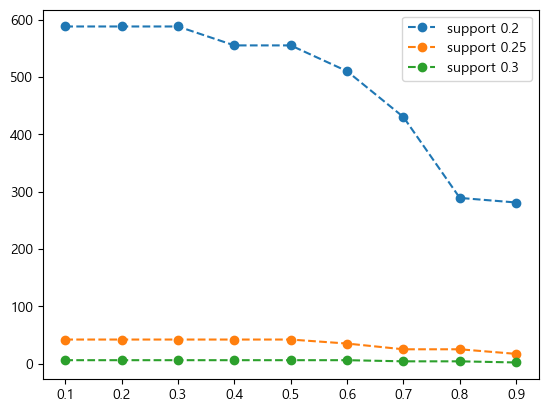

In [160]:
# support_list 사용자 지정 (100개 정도가 적당)
con_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
support_list=[0.2, 0.25, 0.3]

for y,name in zip(total,support_list):
    plt.plot(con_list,y,'o',linestyle='dashed', label='support ' + str(name))
    plt.legend()

In [170]:
stopwords = ['명', '말', '이', '고', '씨', '문', '등']

In [171]:
# 데이터 전처리
res = []
for i in nouns:
    tmp = ' '.join(i)
    tmp = re.sub('[^가-힣a-zA-Z\s]', '', tmp)
    tmp = tmp.split(' ')
    # tmp = [j for j in i if len(j)!=1]
    tmp = [i for i in tmp if i != '']
    tmp = [i for i in tmp if i not in stopwords]
    res.append(list(set(tmp)))
    # res.append(tmp)

<>:5: DeprecationWarning: invalid escape sequence '\s'
<>:5: DeprecationWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_17228\2092019313.py:5: DeprecationWarning: invalid escape sequence '\s'
  tmp = re.sub('[^가-힣a-zA-Z\s]', '', tmp)


### 네트워크 그래프

c:\Users\user\.conda\envs\han\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


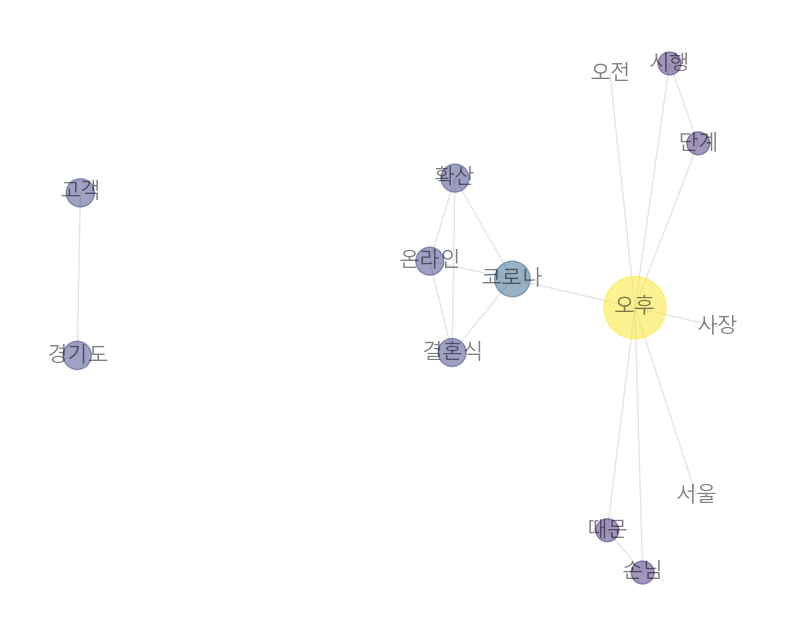

In [174]:
# te.fit(사용자 지정).transform(사용자 지정)
# fit, transform, apriori
te=TransactionEncoder()
te_arry=te.fit(res).transform(res)
df_te=pd.DataFrame(te_arry, columns=te.columns_)
frequency_itemsets=apriori(df_te, use_colnames=True, min_support=0.2, max_len=2)


# length 2만 추출
tmp = []
for i in frequency_itemsets['itemsets']:
    tmp.append(len(i))
frequency_itemsets['length'] = tmp
frequency_itemsets = frequency_itemsets[frequency_itemsets['length'] == 2]


# 네트워크 그래프
ar=frequency_itemsets['itemsets']
G=nx.Graph()
G.add_edges_from(ar)
pr=nx.pagerank(G)

nsize=np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))

plt.figure(figsize=(10,8))
plt.axis('off')
fname = fm.FontProperties().get_name()
nx.draw_networkx(G, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.8', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)

plt.show()